In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class = 6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
#n_neighbors = 30

In [16]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i]),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [15]:
offsetbox.An

<module 'matplotlib.offsetbox' from '/Users/ethen/anaconda/lib/python3.5/site-packages/matplotlib/offsetbox.py'>

In [4]:
from time import time
from sklearn.manifold import TSNE

```
# So it seems like this is happening when mixing numpy installed via pip and conda
conda remove numpy --force -y
pip uninstall numpy -y
conda install numpy


https://github.com/scikit-learn/scikit-learn/issues/6665#issuecomment-264087057
```

In [7]:
X_tsne.shape

(1083, 2)

Computing t-SNE embedding


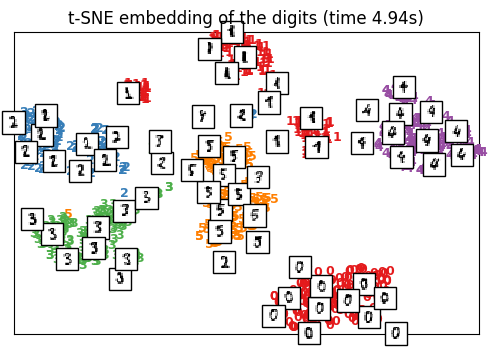

In [5]:
print("Computing t-SNE embedding")
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
t0 = time()
X_tsne = tsne.fit_transform(X)

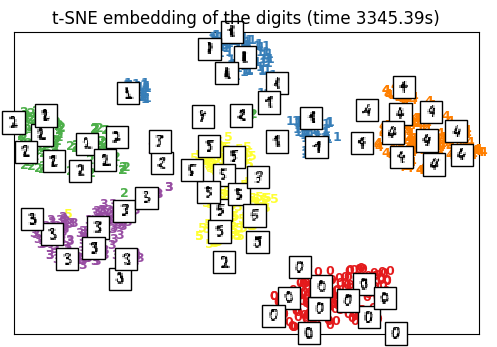

In [17]:
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()